In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('final_vg.csv')
print(data.head())

    Rank                               Name Platform    Year         Genre  \
0   2061                               1942      NES  1985.0       Shooter   
1   9137       ¡Shin Chan Flipa en colores!       DS  2007.0      Platform   
2  14279  .hack: Sekai no Mukou ni + Versus      PS3  2012.0        Action   
3   8359         .hack//G.U. Vol.1//Rebirth      PS2  2006.0  Role-Playing   
4   7109       .hack//G.U. Vol.2//Reminisce      PS2  2006.0  Role-Playing   

            Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0              Capcom  4.569217  3.033887  3.439352     1.991671     12.802935  
1           505 Games  2.076955  1.493442  3.033887     0.394830      7.034163  
2  Namco Bandai Games  1.145709  1.762339  1.493442     0.408693      4.982552  
3  Namco Bandai Games  2.031986  1.389856  3.228043     0.394830      7.226880  
4  Namco Bandai Games  2.792725  2.592054  1.440483     1.493442      8.363113  


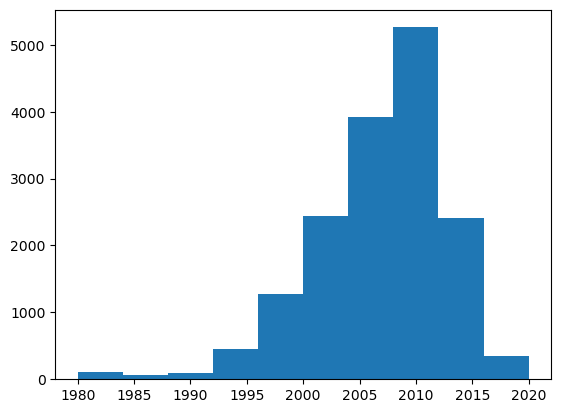

In [4]:
plt.hist(data['Year'])
plt.show()

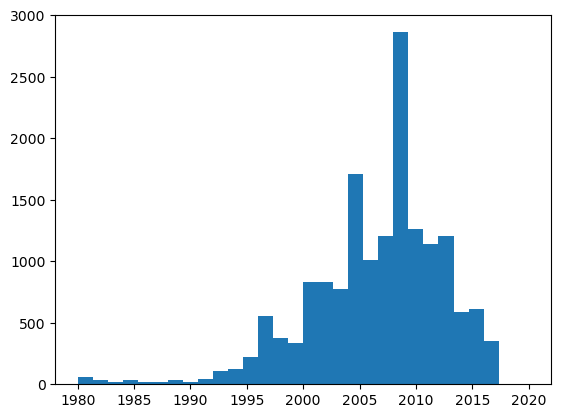

In [5]:
plt.hist(data['Year'],bins=30)
plt.show()

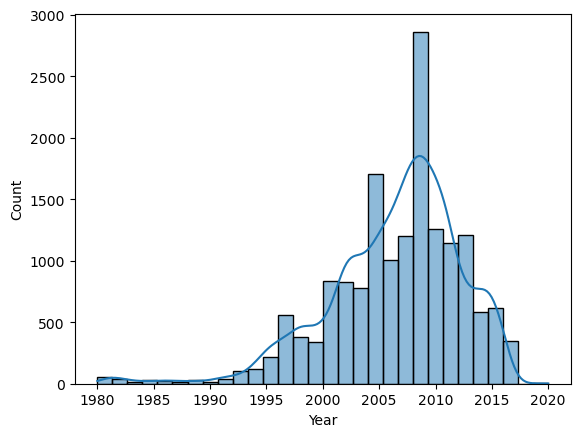

In [8]:
sns.histplot(data['Year'],bins=30,kde=True)
plt.show()

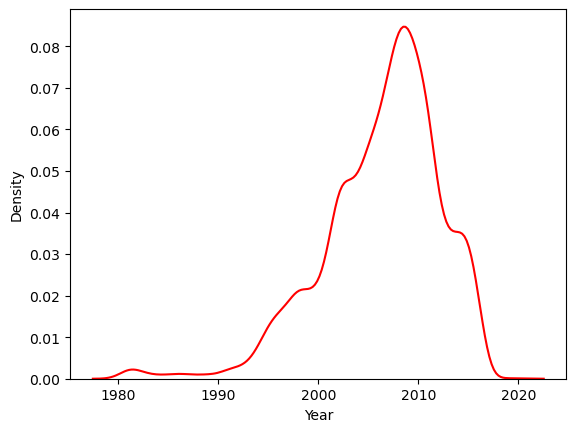

In [10]:
sns.kdeplot(data['Year'],color="red")
plt.show()

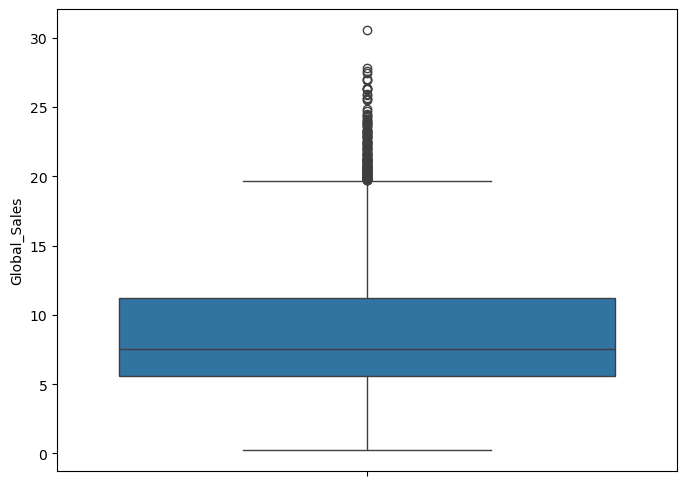

In [ ]:
# boxplot is used for distribution as well as check outlier 
plt.figure(figsize=(8,6))
sns.boxplot(data['Global_Sales'])
plt.show()
# IQR - Q3 - Q1 
# Q3 =75% data
# Q1 = 25 % data which is showing into box the blue box is IQR 

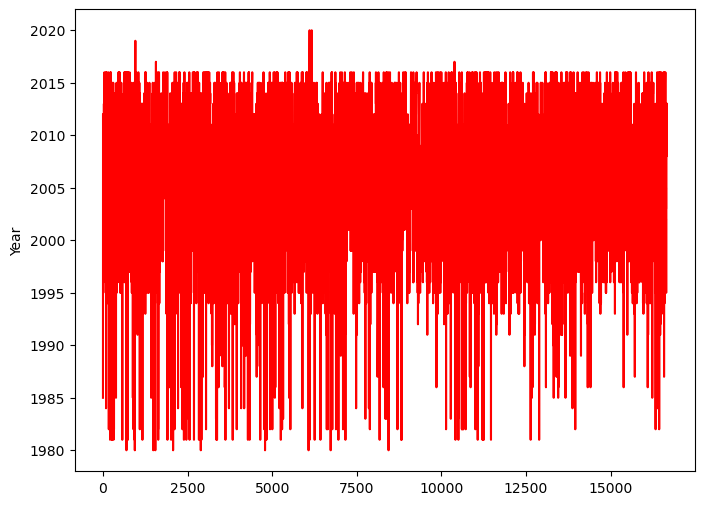

In [17]:
#lineplot - whenever want to see trend over the period of time (forcosting)
# Bi variate
# contineous vs contineous
plt.figure(figsize=(8,6))
sns.lineplot(data["Year"],color="red")
plt.show()

In [18]:
game_life = data.groupby(by = "Name").agg(min_year = ("Year", "min"),
                              max_year = ("Year", "max"))

game_life["range"] = game_life["max_year"] - game_life["min_year"]

game_life_sorted = game_life.sort_values(by = "range", ascending = False).head()
game_life_sorted.reset_index(inplace=True)

print(game_life_sorted)


                               Name  min_year  max_year  range
0                        Ice Hockey    1980.0    2020.0   40.0
1                          Baseball    1980.0    2019.0   39.0
2                        Battlezone    1982.0    2006.0   24.0
3  Romance of the Three Kingdoms II    1991.0    2015.0   24.0
4                         Bomberman    1985.0    2008.0   23.0


In [19]:
print(game_life_sorted.iloc[0:1]['Name'])

0    Ice Hockey
Name: Name, dtype: object


In [20]:
print(game_life_sorted.iloc[0]['Name'])

Ice Hockey


In [21]:
ih=data[data["Name"]==game_life_sorted["Name"][0]]
print(ih)

      Rank        Name Platform    Year   Genre   Publisher  NA_Sales  \
6073   639  Ice Hockey      NES  1988.0  Sports    Nintendo      0.44   
6074  4027  Ice Hockey     2600  1980.0  Sports  Activision      0.39   
6075  4149  Ice Hockey     2600  1991.0  Sports  Activision      0.61   
6076  4149  Ice Hockey     2600  1992.0  Sports  Activision      0.65   
6077  4149  Ice Hockey     SNES  1993.0  Sports  Activision      0.68   
6078  4149  Ice Hockey     SNES  1994.0  Sports  Activision      0.75   
6079  4149  Ice Hockey     SNES  1995.0  Sports  Activision      0.78   
6080  4149  Ice Hockey     SNES  1996.0  Sports  Activision      0.76   
6081  4149  Ice Hockey     SNES  1997.0  Sports  Activision      0.82   
6082  4149  Ice Hockey     SNES  1998.0  Sports  Activision      0.88   
6083  4149  Ice Hockey     SNES  1999.0  Sports  Activision      0.85   
6084  4148  Ice Hockey     SNES  2000.0  Sports  Activision      0.84   
6085  3000  Ice Hockey     SNES  2001.0  Sports  Ac

In [22]:
ih[["Year","NA_Sales"]]

,Year,NA_Sales
6073,1988.0,0.44
6074,1980.0,0.39
6075,1991.0,0.61
6076,1992.0,0.65
6077,1993.0,0.68
6078,1994.0,0.75
6079,1995.0,0.78
6080,1996.0,0.76
6081,1997.0,0.82
6082,1998.0,0.88


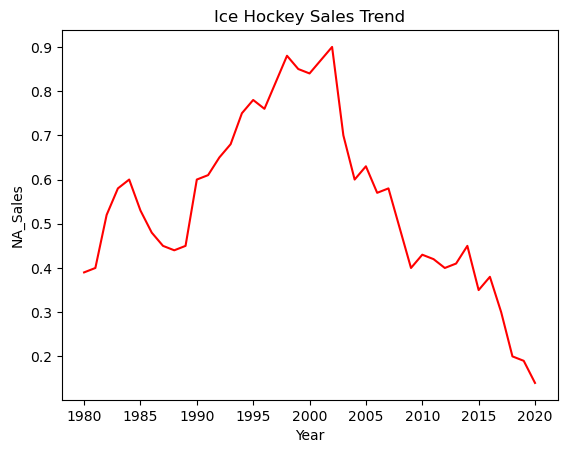

In [23]:
plt.title("Ice Hockey Sales Trend")
sns.lineplot(x="Year",y="NA_Sales",data=ih,color="r")
plt.show()